In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew 
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier 


In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")       #store DataSet in df and use head() to show first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape                                               #df contains 918 samples and 11 Features and Target column

(918, 12)

In [4]:
#make sure if there is any NULL values by this method :

df.isna().sum()                                       #0 NULLs in all columns

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.info()                        #there are 5 Categorical columns , 6 numerical cloumns and HeartDisease"target" column which is numerical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()                     #this show a mathematical summary

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#from prev cell notice that most of FastingBS column have 0 value , lets focus of :
df.FastingBS.value_counts()                        #most of samples doesnot have Diabetes


FastingBS
0    704
1    214
Name: count, dtype: int64

In [8]:
#now lets check if the Target column have Close proportions "that is important to our model"
df.HeartDisease.value_counts()                                      #55% have HeartDisease , 45% not. so it is Close proportions 

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [9]:
#now before dealing with categorical Columns it is necessary to show correlation and skew so lets extraxt numerical columns

df.info()                #to know numerical columns

numerical_df = df[["Age",'RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].copy()

numerical_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


<Axes: >

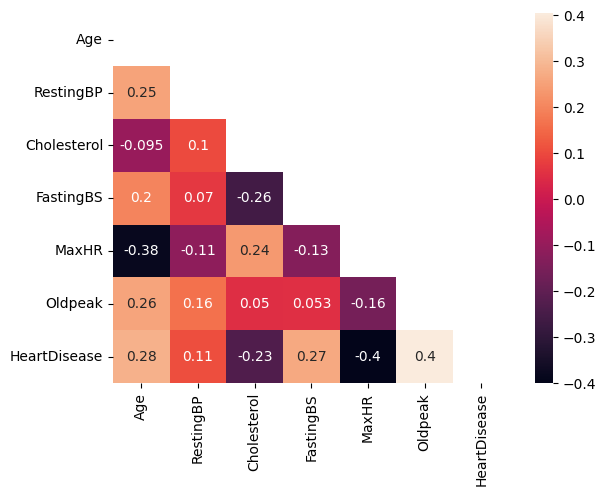

In [10]:
sns.heatmap(numerical_df.corr(),annot=True,mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool)))    

#notice that Oldpeak have the strongest correlation with HeartDisease Result ,  MaxHR has the strongest relation "inverse with target"

In [11]:
numerical_df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

Age boxPlot:


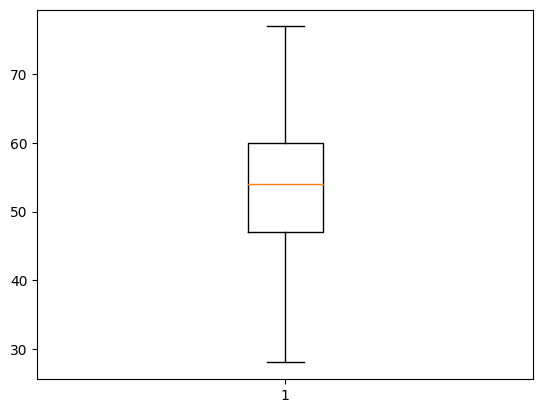

RestingBP boxPlot:


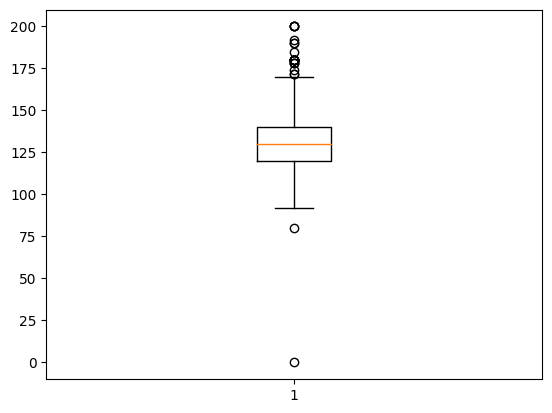

Cholesterol boxPlot:


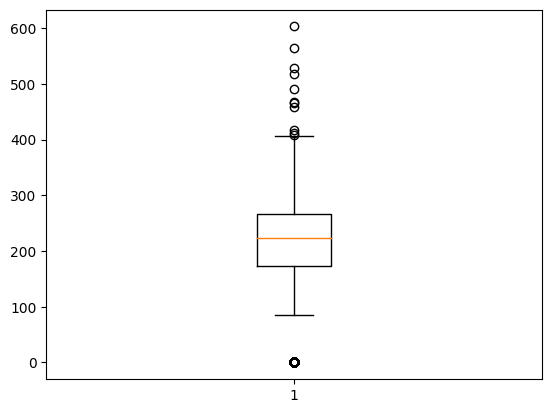

MaxHR boxPlot:


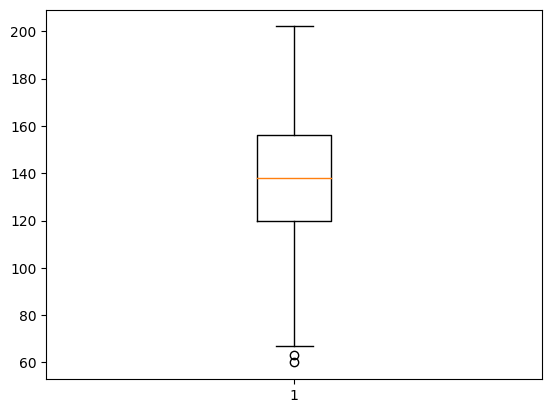

Oldpeak boxPlot:


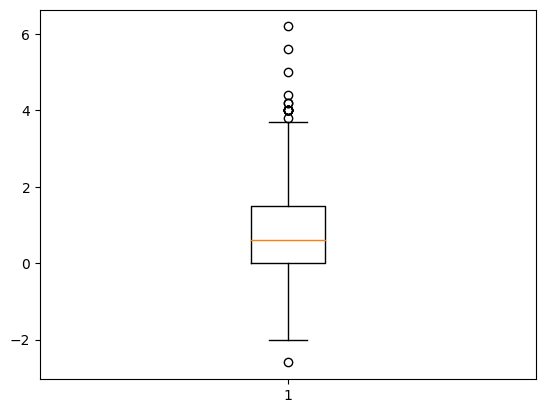

In [12]:
#now let's use boxplot to see if there is any oulier in the Dataset to deal with
numerical_df = numerical_df.drop(["HeartDisease",'FastingBS'],axis=1)
for col in numerical_df.columns : 
    print(col,"boxPlot:")
    plt.boxplot(numerical_df[col])
    plt.show()

In [13]:
#will back to shis soon

#for col in numerical_df.columns :
 #   for x in col:
  #      
   #     q75,q25 = np.percentile(numerical_df.loc[:,x],[75,25])
    #    intr_qr = q75-q25
 #
  #     max = q75+(1.5*intr_qr)
   #     min = q25-(1.5*intr_qr)
 #
  #      numerical_df.loc[numerical_df[x] < min,x] = np.nan
   #     numerical_df.loc[numerical_df[x] > max,x] = np.nan
#
##now let's use boxplot to see if there is any oulier in the Dataset to deal with
#for col in numerical_df.columns : 
 #   print(col,"boxPlot:")
  #  plt.boxplot(numerical_df[col])
   # plt.show()

In [14]:
for col in df.columns :                                               #look how many unique values in each categorical column 
    if df[col].dtype== "object":        
        print("number of unique columns in {} column is".format(col),df[col].nunique(),"\n")
        

#ExerciseAngina have 2 unique values which is yes if True and no if False so lets convert it to 1,0 

number of unique columns in Sex column is 2 

number of unique columns in ChestPainType column is 4 

number of unique columns in RestingECG column is 3 

number of unique columns in ExerciseAngina column is 2 

number of unique columns in ST_Slope column is 3 



In [15]:
df['ExerciseAngina'] = df['ExerciseAngina'].map( 
                   {'Y':1 ,'N':0}) 

df['ExerciseAngina'].value_counts()    #it runs successfully , Great

ExerciseAngina
0    547
1    371
Name: count, dtype: int64

In [16]:
#now the next step is to convert the numerical columns to numerical using OneHotEncoding or LabelEncoding , i will use OHE
df=pd.get_dummies(df).astype(int)                     #OHE convert it into Boolean Values so use astype(int) to convert it into 1's and zeros
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [17]:
features = df.drop("HeartDisease",axis=1)
target=df['HeartDisease']
x_train , x_test , y_train , y_test = train_test_split (features,target,test_size=0.3,random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((642, 19), (276, 19), (642,), (276,))

In [18]:
df.describe()

#notice that in some columns MAX values are : 77 , 200 , 603 ,1    and MIN are : 28 , 0 , 60 
#so the columns dont have the same scale and that would lead to problems with our model so lets scale them

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)     
x_test =  scaler.fit_transform(x_test)                    #now all columns have values in range 0 : 1


In [19]:

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9057971014492754


In [20]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train,y_train)
y_predd=logreg.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9057971014492754


In [21]:
pip install lazypredict


ERROR: Could not find a version that satisfies the requirement lazypredict (from versions: none)
ERROR: No matching distribution found for lazypredict
Note: you may need to restart the kernel to use updated packages.


In [22]:
import lazypredict

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models,"\n")

In [ ]:
rfc =RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(accuracy_score(y_test,y_pred))


In [ ]:
print(confusion_matrix(y_test,y_pred))
